# 01. Ridership Trend Analysis

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import dates
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('transit-ridership.csv')

In [3]:
df = pd.read_csv('transit-ridership.csv') #First read all the data from the csv file
df= df.rename(columns={'Unnamed: 0': 'Year'}) #Rename the unnamed column title to 'Year'
for i in df.columns: #for each column
    df[i] = df[i].replace(",", "", regex=True) #remove all the commas in between each values
df = df._convert(numeric=True) #convert the elements to numeric values
df

,Year,July,October,December,February,Total
0,FY97,287136,1052714,807508,1157678,9501302.0
1,FY98,289269,1142300,753231,982453,8670906.0
2,FY99,281914,1055683,673696,1006772,8628101.0
3,FY00,297848,1060153,650067,1091131,8800655.0
4,FY01,270213,1085119,825356,1159928,10102665.0
5,FY02,286552,1227976,524747,1118989,9084277.0
6,FY03,311041,1169216,787201,1133363,9369218.0
7,FY04,338494,1305943,813161,1154057,10435923.0
8,FY05,341083,1217625,739941,1200637,10136585.0
9,FY06,289169,1135129,736504,1167974,9958497.0


In [4]:
df.describe()

,July,October,December,February,Total
count,26.000000,2.600000e+01,2.600000e+01,2.600000e+01,2.500000e+01
mean,353758.269231,1.200681e+06,7.662968e+05,1.181454e+06,1.018373e+07
std,80252.448764,2.425953e+05,1.791262e+05,2.563263e+05,2.005362e+06
min,226004.000000,3.437650e+05,2.141830e+05,3.180710e+05,3.480360e+06
25%,289194.000000,1.130592e+06,6.893980e+05,1.122582e+06,9.365436e+06
50%,339788.500000,1.209716e+06,7.923785e+05,1.171838e+06,1.010266e+07
75%,412077.750000,1.337396e+06,8.695310e+05,1.325072e+06,1.152838e+07
max,524178.000000,1.606340e+06,1.068610e+06,1.582330e+06,1.355178e+07


In [5]:
#Eliminating null values 
#To do so, if we find a null, we are going to replace them with the mean of the column
count = 1997
total = len(df[i])
for i in df.columns:
    if i == 'Year':
        df[i] = np.array([x for x in range(count,count+total)])

df = df.dropna(axis=0) #we are going to drop NaN values for conveinience
time_data_frame = df 
time_data_frame

,Year,July,October,December,February,Total
0,1997,287136,1052714,807508,1157678,9501302.0
1,1998,289269,1142300,753231,982453,8670906.0
2,1999,281914,1055683,673696,1006772,8628101.0
3,2000,297848,1060153,650067,1091131,8800655.0
4,2001,270213,1085119,825356,1159928,10102665.0
5,2002,286552,1227976,524747,1118989,9084277.0
6,2003,311041,1169216,787201,1133363,9369218.0
7,2004,338494,1305943,813161,1154057,10435923.0
8,2005,341083,1217625,739941,1200637,10136585.0
9,2006,289169,1135129,736504,1167974,9958497.0


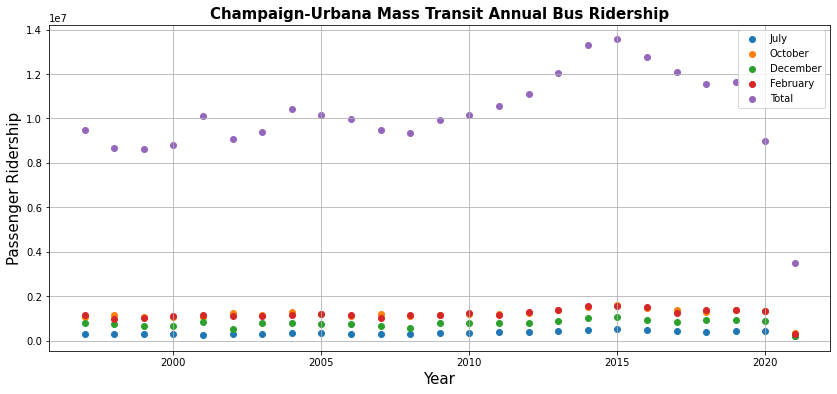

In [6]:
#### Now we are going to plot the graph using matplotlib to visualize our data input
x = df['Year'] #x-axis is going to be our year
figure = plt.figure(figsize=(14,6)) #adjust the figure size
plt.title('Champaign-Urbana Mass Transit Annual Bus Ridership',fontweight='bold',fontsize=15) #add the title
plt.grid() #add the grid
plt.xlabel('Year',fontsize=15) #add the x-axis label
plt.ylabel('Passenger Ridership',fontsize=15) #add the y-axis label
temp = df.drop('Year',axis=1) #Just drop the year column because we are not going to use that for our data analytics
for i in temp.columns: #Now for each column in our python dataframe column
    plt.scatter(x,temp[i]) #I want to keep plotting
    
plt.legend(temp) #Don't forget to add the legend

Text(0.5, 1.0, 'Passenger Ridership vs Months')

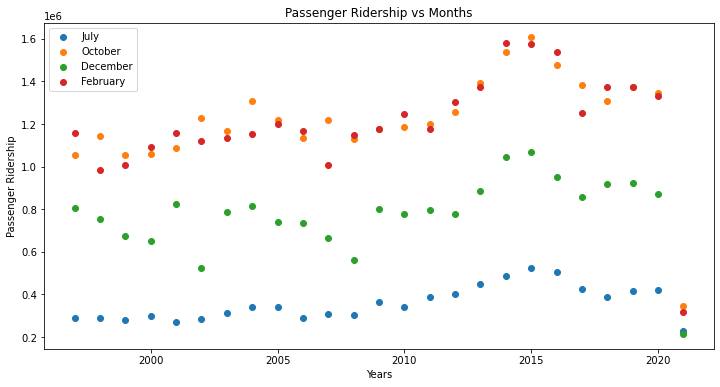

In [7]:
months1 = df.drop('Year',axis=1)
months = months1.drop('Total',axis=1)
plt.figure(figsize=(12,6))
for i in months.columns:
    plt.scatter(x,months[i])
plt.legend(months)
plt.xlabel('Years')
plt.ylabel('Passenger Ridership')
plt.title('Passenger Ridership vs Months')

In [8]:
#The function which uses the linear regression method to determine the line of best fit
def line_of_best_fit(x,temp,month_name,degree,co): 
    linear_reg = np.polyfit(x,temp,deg = degree)
    linear_trend = np.polyval(linear_reg,x) #slope and y intercept
    plt.scatter(x,temp,label='plots',color='b')
    plt.plot(x,linear_trend,label='line of best fit',color=co)
    plt.xlabel('Years')
    plt.ylabel('Passenger Ridership')
    plt.title(month_name+' Ridership')
    plt.legend()
    plt.show()
    return figure

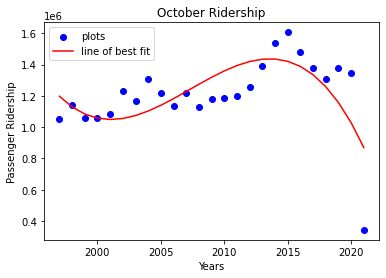

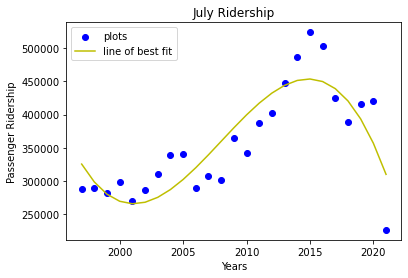

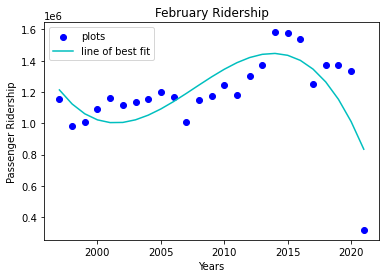

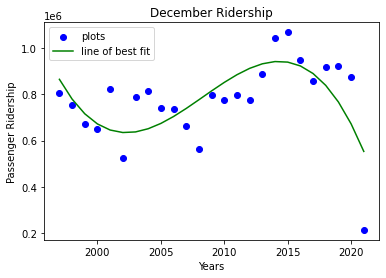

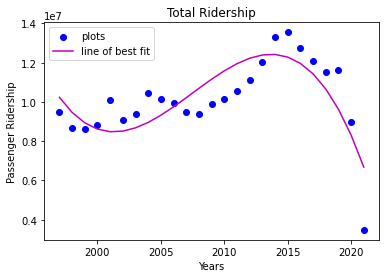

In [9]:
october = 'October'
linear_trend = line_of_best_fit(x,months[october],october,3,'r')

july = 'July'
linear_trend = line_of_best_fit(x,months[july],july,3,'y')

february = 'February'
linear_trend = line_of_best_fit(x,months[february],february,3,'c')

december = 'December'
linear_trend = line_of_best_fit(x,months[december],december,3,'g')

total = 'Total'
linear_trend = line_of_best_fit(x,months1[total],total,3,'m')

# 02. Data Cleaning

In [10]:
time_data_frame

,Year,July,October,December,February,Total
0,1997,287136,1052714,807508,1157678,9501302.0
1,1998,289269,1142300,753231,982453,8670906.0
2,1999,281914,1055683,673696,1006772,8628101.0
3,2000,297848,1060153,650067,1091131,8800655.0
4,2001,270213,1085119,825356,1159928,10102665.0
5,2002,286552,1227976,524747,1118989,9084277.0
6,2003,311041,1169216,787201,1133363,9369218.0
7,2004,338494,1305943,813161,1154057,10435923.0
8,2005,341083,1217625,739941,1200637,10136585.0
9,2006,289169,1135129,736504,1167974,9958497.0


In [11]:
df = {}
df['February'] = time_data_frame.iloc[:,4]
df['July'] = time_data_frame.iloc[:,1]
df['October'] = time_data_frame.iloc[:,2]
df['December'] = time_data_frame.iloc[:,3]
time_series = pd.DataFrame(df)

In [12]:
matrix = np.zeros((25,4))
col_index = 0
for cols in time_series.columns:
    matrix[:,col_index] = time_series[cols].values[:]
    col_index += 1

In [13]:
x = []
y = []
for row in range(25):
    for col in range(4):
        y.append(matrix[row][col])

In [14]:
start_year = 1997
for i in range(len(y)):
    if i % 4 == 0:
        x.append('02-01-'+str(start_year))
    elif i % 4 == 1:
        x.append('07-01-'+str(start_year))
    elif i % 4 == 2:
        x.append('10-01-'+str(start_year))
    elif i % 4 == 3:
        x.append('12-01-'+str(start_year))
        start_year+= 1

In [15]:
from datetime import datetime

In [16]:
df = {}
df['Time'] = x
df['Time'] = pd.to_datetime(df['Time'])
df['Passengers'] = y

In [17]:
modified_time_df = pd.DataFrame(df)

In [18]:
modified_time_df = modified_time_df.set_index('Time')

In [19]:
modified_time_df

,Passengers
Time,
1997-02-01,1157678.0
1997-07-01,287136.0
1997-10-01,1052714.0
1997-12-01,807508.0
1998-02-01,982453.0
...,...
2020-12-01,873429.0
2021-02-01,318071.0
2021-07-01,226004.0


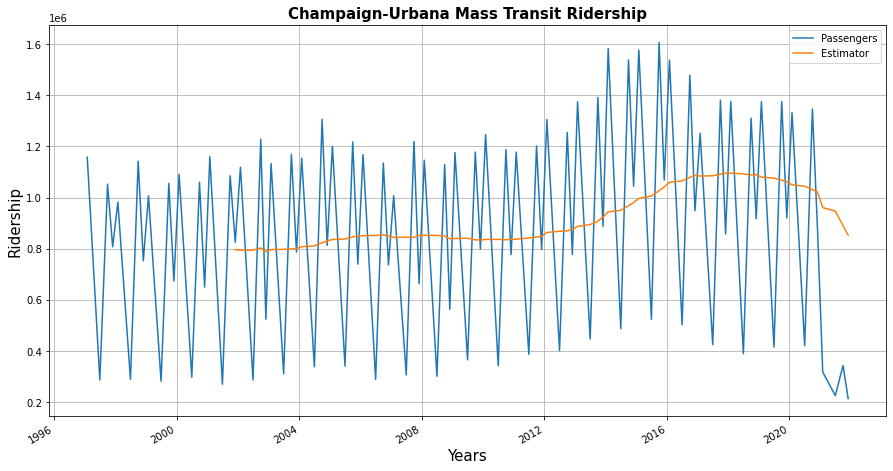

In [20]:
modified_time_df.plot(figsize=(15,8))
modified_time_df.rolling(window=20).mean()['Passengers'].plot(label='Estimator')
plt.grid()
plt.xlabel('Years',fontsize=15)
plt.ylabel('Ridership',fontsize=15)
plt.title('Champaign-Urbana Mass Transit Ridership',fontsize=15,fontweight='bold')
plt.legend()

# 03. Machine Learning & Dataset Training

In [21]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
modified_time_df = modified_time_df.asfreq('d').interpolate().asfreq('q', fill_value = 9.0)
modified_time_df.info()
training_df = modified_time_df.iloc[:80]
test_df = modified_time_df.iloc[79:]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 99 entries, 1997-03-31 to 2021-09-30
Freq: Q-DEC
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Passengers  99 non-null     float64
dtypes: float64(1)
memory usage: 1.5 KB


C:\Users\LOTLOUISCHO\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


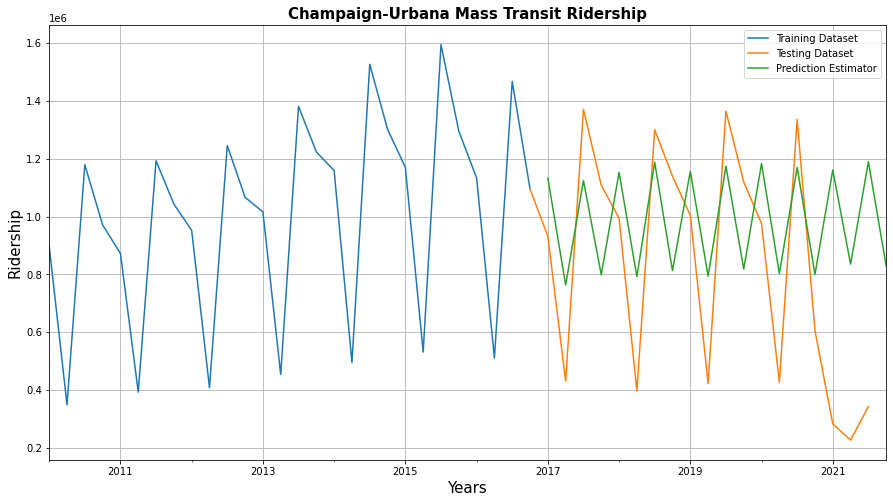

In [23]:
fit_model = ExponentialSmoothing(training_df['Passengers'],trend='add',seasonal='add',seasonal_periods=14).fit()
prediction = fit_model.forecast(20)
training_df['Passengers'].plot(figsize=(15,8),label='Training Dataset')
test_df['Passengers'].plot(label='Testing Dataset')
prediction.plot(xlim=['2010-02-01','2021-10-01'],label='Prediction Estimator')
plt.grid()
plt.xlabel('Years',fontsize=15)
plt.ylabel('Ridership',fontsize=15)
plt.title('Champaign-Urbana Mass Transit Ridership',fontsize=15,fontweight='bold')
plt.legend()

In [24]:
mean_absolute_error(test_df,prediction)

430076.94040383556

In [25]:
mean_squared_error(test_df,prediction)

265478323501.64444

In [26]:
np.sqrt(mean_squared_error(test_df,prediction))

515245.88644805737

# 04. Traffic Time Series Forecasting

In [27]:
traffic_model = ExponentialSmoothing(training_df['Passengers'],trend='add',seasonal='add',seasonal_periods=14).fit()
passenger_forecast = traffic_model.forecast(60)
passenger_forecast

C:\Users\LOTLOUISCHO\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2017-03-31    1.133109e+06
2017-06-30    7.629578e+05
2017-09-30    1.124442e+06
2017-12-31    7.985072e+05
2018-03-31    1.153054e+06
2018-06-30    7.917197e+05
2018-09-30    1.187828e+06
2018-12-31    8.125938e+05
2019-03-31    1.156603e+06
2019-06-30    7.939608e+05
2019-09-30    1.174333e+06
2019-12-31    8.181559e+05
2020-03-31    1.183415e+06
2020-06-30    8.024612e+05
2020-09-30    1.169752e+06
2020-12-31    7.996006e+05
2021-03-31    1.161085e+06
2021-06-30    8.351500e+05
2021-09-30    1.189696e+06
2021-12-31    8.283625e+05
2022-03-31    1.224470e+06
2022-06-30    8.492366e+05
2022-09-30    1.193246e+06
2022-12-31    8.306036e+05
2023-03-31    1.210976e+06
2023-06-30    8.547987e+05
2023-09-30    1.220057e+06
2023-12-31    8.391041e+05
2024-03-31    1.206395e+06
2024-06-30    8.362434e+05
2024-09-30    1.197728e+06
2024-12-31    8.717928e+05
2025-03-31    1.226339e+06
2025-06-30    8.650053e+05
2025-09-30    1.261113e+06
2025-12-31    8.858794e+05
2026-03-31    1.229889e+06
2

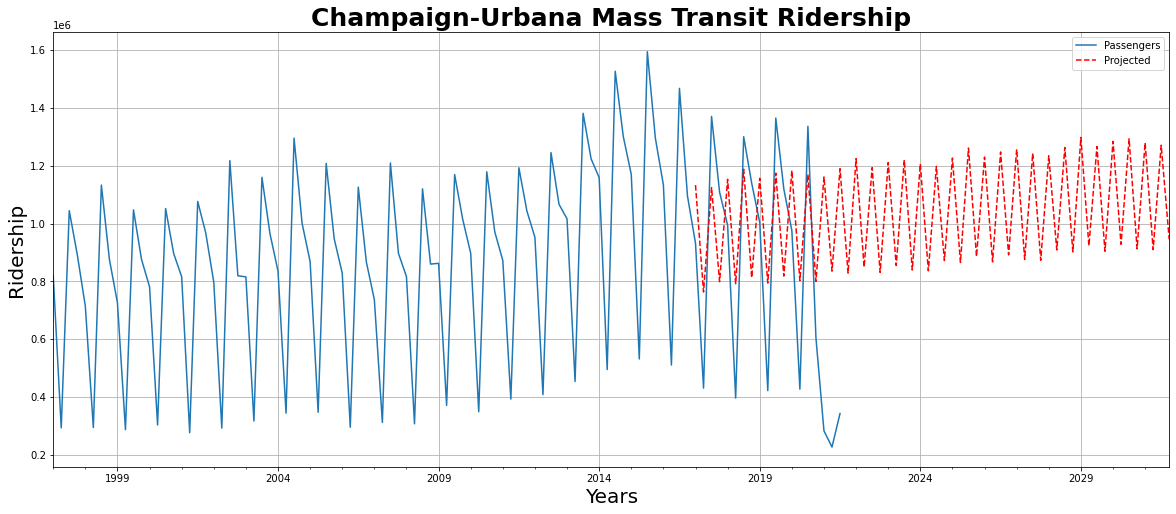

In [28]:
modified_time_df.plot(figsize=(20,8))
passenger_forecast.plot(label='Projected',style='--',color='r')
plt.grid()
plt.xlabel('Years',fontsize=20)
plt.ylabel('Ridership',fontsize=20)
plt.title('Champaign-Urbana Mass Transit Ridership',fontsize=25,fontweight='bold')
plt.legend()